In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import rc

rc('font', family='Malgun Gothic')

In [3]:
마트판매현황 = pd.read_excel('data/합친결과.xlsx') # 2016년도 전반기
print(마트판매현황.shape)
마트판매현황.head()

(1200, 5)


,상품명,판매건수,가격,매출,년월
0,봉투,12362,50,618100.0,2016-01
1,바나나,4285,3900,16711500.0,2016-01
2,야채,4190,0,0.0,2016-01
3,켐벨포도,2780,29800,82844000.0,2016-01
4,알뜰특란,2768,5300,14670400.0,2016-01


In [5]:
마트판매현황.describe()

,판매건수,가격,매출
count,1200.000000,1200.000000,2.000000e+02
mean,744.155833,3070.058333,2.136844e+06
std,985.465488,4894.043417,6.784060e+06
min,214.000000,0.000000,0.000000e+00
25%,337.000000,640.000000,2.390625e+05
50%,496.000000,1980.000000,1.089000e+06
75%,800.500000,3980.000000,1.796535e+06
max,12414.000000,49800.000000,8.284400e+07


In [6]:
마트판매현황.describe().loc['max']

판매건수       12414.0
가격         49800.0
매출      82844000.0
Name: max, dtype: float64

In [7]:
마트판매현황.describe(percentiles=[.10, .20, .30, .40, .50, .60, .70, .80, .90])

,판매건수,가격,매출
count,1200.000000,1200.000000,2.000000e+02
mean,744.155833,3070.058333,2.136844e+06
std,985.465488,4894.043417,6.784060e+06
min,214.000000,0.000000,0.000000e+00
10%,280.900000,0.000000,0.000000e+00
20%,319.000000,0.000000,0.000000e+00
30%,360.000000,990.000000,5.298570e+05
40%,418.600000,1486.000000,8.385420e+05
50%,496.000000,1980.000000,1.089000e+06
60%,582.000000,2750.000000,1.417080e+06


In [12]:
마트판매현황['상품명'].value_counts().sort_values(ascending=False)[:10]

감귤       16
봉투       12
바나나      12
청양고추     12
파프리카     11
켐벨포도     10
토마토      10
양배추       9
새송이버섯     9
거봉        8
Name: 상품명, dtype: int64

In [19]:
마트판매현황.pivot_table(index='상품명')

,가격,매출,판매건수
상품명,,,
...,1485.0,NaN,709.0
1,0.0,NaN,299.0
CJ)더안심건강란,5800.0,NaN,334.0
CJ)안심종합어묵,4250.0,1547000.0,364.0
CJ)얇은사각어묵,1500.0,730500.0,487.0
...,...,...,...
햇살드린쌀,49800.0,NaN,447.0
허니미니꿀호떡,1000.0,439000.0,439.0
호박고구마,0.0,0.0,274.0


In [28]:
마트판매현황.pivot_table(index='상품명', values=['판매건수', '매출'])

,매출,판매건수
상품명,,
...,1165230.0,709.0
1,0.0,299.0
CJ)더안심건강란,1937200.0,334.0
CJ)안심종합어묵,1547000.0,364.0
CJ)얇은사각어묵,730500.0,487.0
...,...,...
햇살드린쌀,22260600.0,447.0
허니미니꿀호떡,439000.0,439.0
호박고구마,0.0,274.0


In [21]:
마트판매현황.pivot_table(index='상품명')['판매건수']

상품명
...          709.0
1            299.0
CJ)더안심건강란    334.0
CJ)안심종합어묵    364.0
CJ)얇은사각어묵    487.0
             ...  
햇살드린쌀        447.0
허니미니꿀호떡      439.0
호박고구마        274.0
황도복숭아        337.2
흙당근          759.0
Name: 판매건수, Length: 384, dtype: float64

In [29]:
마트판매현황['매출'] = 마트판매현황['가격'] * 마트판매현황['판매건수']
마트판매현황.pivot_table(index='상품명', values=['판매건수', '매출'])

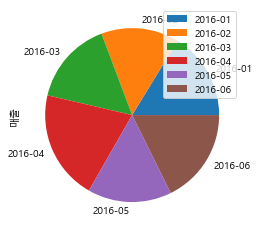

In [36]:
마트판매현황.pivot_table(index='년월', values=['판매건수', '매출'], aggfunc='mean').plot(kind='pie', y='매출')

In [4]:
top100 = pd.read_excel('data/top100.xlsx', index_col='id')
print(top100.shape)
top100.head()

(100, 4)


,album_name,artist_name,name,좋아요
id,,,,
31093710,Red Diary Page.2,볼빨간사춘기,여행,124968
31085237,LOVE YOURSELF 轉 `Tear`,방탄소년단,FAKE LOVE,200654
31113240,1÷χ=1 (UNDIVIDED),Wanna One (워너원),켜줘 (Light),93035
31113241,1÷χ=1 (UNDIVIDED),Wanna One (워너원) - 트리플포지션,캥거루 (Kangaroo) (Prod. ZICO),79320
31113243,1÷χ=1 (UNDIVIDED),Wanna One (워너원) - 더힐,모래시계 (Prod. 헤이즈),67872


In [13]:
top100.describe()

,좋아요
count,100.000000
mean,113674.630000
std,69553.726592
min,1315.000000
25%,60615.250000
50%,103372.000000
75%,141283.250000
max,330623.000000


In [17]:
top100['artist_name'].value_counts().sort_values(ascending=False)

방탄소년단              14
EXO-CBX (첸백시)       7
Wanna One (워너원)     5
SHINee (샤이니)        4
멜로망스                3
                   ..
Troye Sivan         1
오반 (OVAN)           1
길구봉구                1
화사 (마마무)            1
BLACKPINK           1
Name: artist_name, Length: 62, dtype: int64

In [46]:
top10 = top100.pivot_table(index='artist_name', values='좋아요', aggfunc='mean').sort_values('좋아요', ascending=False).head(10)

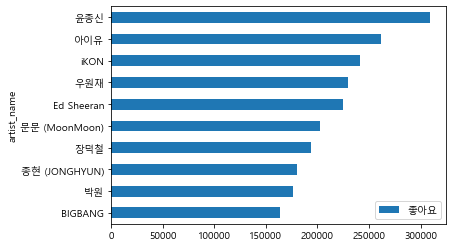

In [51]:
top10.sort_values('좋아요', ascending=True).plot(kind='barh')